<a href="https://colab.research.google.com/github/bhaavvya/OCR_text_extraction/blob/main/OCR_text_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Character Recognition
What is OCR? OCR stands for "Optical Character Recognition." It is a technology that recognizes text within a digital image. It is commonly used to recognize text in scanned documents and images. OCR software can be used to convert a physical paper document, or an image into an accessible electronic version with text.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install and import dependencies

!pip3 install easyocr
!pip3 install torch torchvision torchaudio


In [14]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

## read in images or videos

In [15]:
image_path = '/content/drive/MyDrive/opencv/OCR text extraction/idcard.jpg'

In [16]:
image_path

'/content/drive/MyDrive/opencv/OCR text extraction/idcard.jpg'

In [17]:
reader = easyocr.Reader(['en'],gpu=True)
result = reader.readtext(image_path)
result

[([[193, 17], [245, 17], [245, 35], [193, 35]], 'Aon', 0.16109628187294917),
 ([[357, 58], [988, 58], [988, 193], [357, 193]],
  'SOMAIYA',
  0.9185304571287358),
 ([[366, 180], [981, 180], [981, 241], [366, 241]],
  'VIDYAVIHAR UNIVERSITY',
  0.999182194909312),
 ([[733, 455], [823, 455], [823, 891], [733, 891]], '[', 0.04812729290666429),
 ([[141, 1007], [891, 1007], [891, 1076], [141, 1076]],
  'KJ Somaiya College of Engineering',
  0.8509246215635299),
 ([[24, 1107], [507, 1107], [507, 1171], [24, 1171]],
  'BHAWYA D VERMA',
  0.8450421928841877),
 ([[23, 1200], [386, 1200], [386, 1245], [23, 1245]],
  'ID No: 1620210067',
  0.9797447330603868),
 ([[699, 1200], [1003, 1200], [1003, 1245], [699, 1245]],
  'Tel: 9867929151',
  0.823927484910046),
 ([[22, 1263], [352, 1263], [352, 1320], [22, 1320]],
  'Blood Group: A+',
  0.6418190013204876),
 ([[488, 1354], [597, 1354], [597, 1409], [488, 1409]],
  'Led',
  0.17958174564451293),
 ([[824, 1388], [992, 1388], [992, 1472], [824, 1472]]

## draw results

In [18]:
topleft = result[0][0][0]
bottomright = result[0][0][2]
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

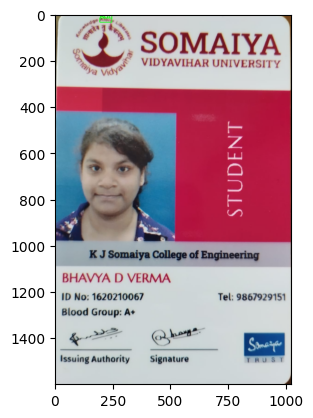

In [19]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.rectangle(img, topleft, bottomright, (0,255,0), 2)
img = cv2.putText(img, text, topleft, font, 1, (0,255,0), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

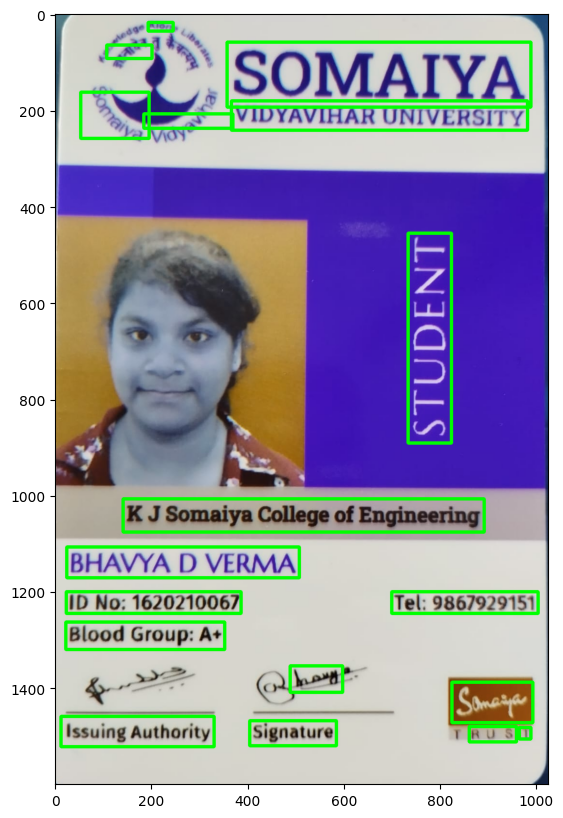

In [20]:
# prompt: TypeError: 'type' object is not subscriptable

# Fix the line: img = cv2.rectangle(img, topleft, bottomright, (0,255,0), 2)
# Change: int[val] to int(val)
img = cv2.imread(image_path)
for detection in result:
  topleft = tuple([int(val) for val in detection[0][0]])
  bottomright = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.rectangle(img, topleft, bottomright, (0,255,0), 5)
  # img = cv2.putText(img, text, topleft, font, 2, (255,255,255), 2, cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


## handling multiple lines

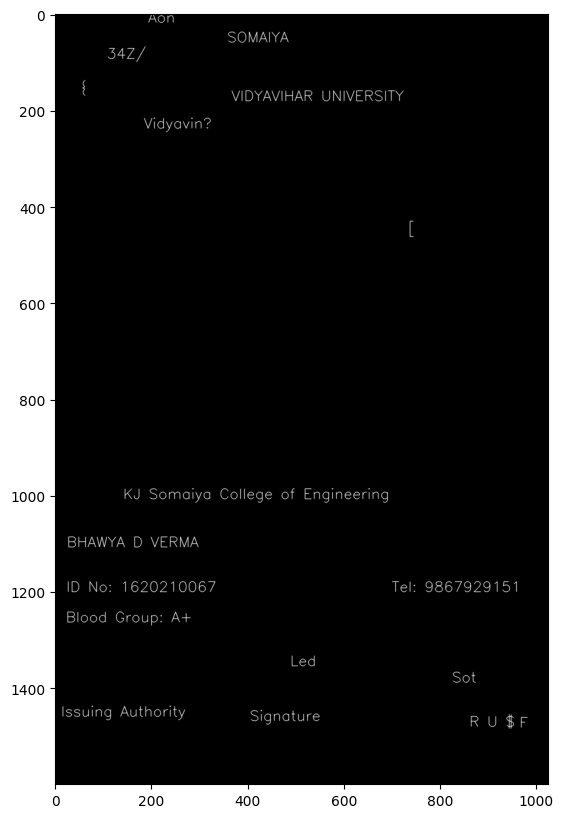

In [23]:
# prompt: i want all the text extracted to appear in a different blank page

# Create a new blank image
blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

# Loop through the results and draw the text on the blank image
for detection in result:
  topleft = tuple([int(val) for val in detection[0][0]])
  bottomright = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 0.1
  thickness = 0.5
  blank_image = cv2.putText(blank_image, text, topleft, font, 1, (255,255,255), 1, cv2.LINE_AA)

# Display the blank image with the extracted text
plt.figure(figsize=(10,10))
plt.imshow(blank_image)
plt.show()
